<center><h1>Predictions on Privacy Policies</h1></center>
<center><h2>CSC 4444 Artificial Intelligence Final Project</h2></center>
<center><h3>A. Cao, B. Mendoza, J. Huxen, N. Vu , T. Hill, G. Johnson, N. Tomba, R. Stephens </h3></center>
<center><h5>December 4, 2018</h5></center>

## Abstract
<p>In response to recent government regulatory changes, many tech companies collectively filled their users’ email inboxes with updated privacy policies and terms of service agreement changes. However, because the policies are filled with dense legal language, many emails went unopened while others were sent directly into the trash folder. As a society, we responded with a collective “too long, didn’t read.” Users know that they should read such policies, but they rarely do. Here, we aim to create an intelligent privacy policy evaluator which fixes this issue.
<br />Our application will take in privacy policy text and return an evaluation of the policy based on ten criterion. We will create a set of training sentences from privacy policies vetted and analyzed by humans. The model will be trained on the training dataset. Finally, we will test the model by feeding it new privacy policy texts and ask it to return the most important sentences. Ideally, the model will be implemented in some usable app form such as a browser plugin.</p>

## Introduction
<p>We evaluate a privacy policy with respect to a list of ten privacy factors. For each of these factors, e.g., email address, we answer a basic question such as "How does the site handle your email address?" The answers to these questions are mapped to three levels of risk: 1 (high risk), 2 (medium risk), and 3 (low risk). For example, if a website does ask for an email addresses, but states in the privacy policy that uses them only for the intended service, it is ranked at the yellow risk level. This labeled data was obtained from a pilot study (<a href="https://dl.acm.org/citation.cfm?id=3127519">Zaeem 2016</a>).
<br />We predict risk values for each privacy factor using a classification (supervised machine learning) model. Training was done against privacy policies for each factor and predictions were on risk factors of other policies.</p>
    
## The Data
<p>The UTA dataset contains roughly 400 privacy policies randomly selected from the NYSE, Nasdaq and AMEX company listings, and manually assigned risk levels to the ten factors. The dataset is balanced, as there are an equal number of low, medium, and high risk policies among each of the ten variables. Thus, we expect our baseline prediction accuracy to be $33\%$ in any particular factor. Pre-processing was done with an algorithmic approach.</p>

    


We first demonstrate functions from our text_preprocessor module.

In [1]:
from text_preprocessor import *
from notebook import psource

psource(process)

After removing stopwords, non-alphanumeric character, and lowercasing the dataset, we then create our desired datasets.

In [2]:
psource(keyword_in_para)

psource(create_output)

Here, we search each paragraph per text file containing a privacy policy. If a particular paragraph contains a keyword from our search words, we keep it for our training and testing data.

We wish to train on integers and not strings, so we create a word_index dictionary that maps every unique word to a unique integer. There are around $10,000$ unique words in this dataset.

In [3]:
psource(create_dictionary)

For training we utilize keras, an API from the tensorflow library.

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

1.11.0


The tensorflow version demonstrated in this jupyter notebook will be version 1.11.0 running on Python 3.6. We now build our dataset. To save computational time in our notebook, we will only demonstrate training on the email factors.

In [5]:
import pandas as pd

# load the csv file
word_index = create_dictionary()
csv_loc = "C:/Users/Stephen/Desktop/4444-Group-Project/neural_net/question-set.csv"
df = pd.read_csv(csv_loc, sep = ",", header = 0)

# create empty lists for training and testing sets
email_test_data = []
email_train_data = []
email_test_labels = []
email_train_labels = []

Here, we load our csv files containing the data labels and create empty lists for our training and testing sets. We now fill these lists.

In [6]:
# fill training set
for i in range(2, 400):
    outputString = ""
    try:
        outputString = " ".join(create_output("UTA/%i.txt" % i)[0])
        email_train_data.append(outputString.split(" "))
        email_train_labels.append(int(df["Email"][i-2]) % 3)
    except:
        continue
        
# convert to integers with the dictionary
for i in range(len(email_train_data)):
    for j in range(len(email_train_data[i])):
        email_train_data[i][j] = word_index[email_train_data[i][j]]

# fill testing set
for i in range(400, 456):
    outputString = ""
    try:
        outputString = " ".join(create_output("UTA/%i.txt" % i)[0])
        email_test_data.append(outputString.split(" "))
        email_test_labels.append(int(df["Email"][i-2]) % 3)
    except:
        continue

# convert to integers with the dictionary
for i in range(len(email_test_data)):
    for j in range(len(email_test_data[i])):
        email_test_data[i][j] = word_index[email_test_data[i][j]]

We can take a moment to explore the data and understand its format. Each example is now an array of integers representing the words of the privacy policy. In our specific case, these will be words with relevance to the email factor. Each label is an integer value of $1$, $2$, or $3\pmod 3$. 

In [7]:
print("Training entries: {}, labels: {}".format(len(email_train_data), len(email_train_labels)))

Training entries: 292, labels: 292


Here is what the first privacy policy looks like in integer format:

In [8]:
print(email_train_data[0])

[61, 62, 12, 5, 6, 102, 103, 104, 84, 105, 106, 86, 8, 79, 103, 104, 86, 103, 104, 107, 86, 108, 22, 109, 110, 111, 112, 99, 59, 86, 92, 110, 80, 113, 114, 115, 116, 117, 86, 118, 85, 92, 19, 119, 90, 91, 120, 121, 48, 122, 123, 92, 110, 92, 124, 125, 86, 126, 81, 92, 19, 127, 128, 126, 129, 5, 130, 131, 132, 92, 133, 126, 59, 134, 135, 136, 8, 87, 134, 137, 132, 12, 126, 138, 139, 140, 141, 142, 126, 143, 144, 134, 145, 146, 92, 147, 141, 126, 134, 12, 161, 162, 126, 134, 92, 90, 91, 120, 163, 8, 164, 165, 166, 167, 168, 169, 170, 134, 171, 171, 126, 172, 173, 22, 150, 174, 175, 16, 86, 176, 8, 177, 178, 179, 171, 180, 181, 12, 182, 12, 179, 165, 86, 184, 153, 95, 185, 86, 184, 186, 187, 188, 189, 190, 153, 154, 191, 192, 8, 193, 194, 195, 196, 197, 116, 198, 199, 200, 115, 201, 103, 104, 86, 43, 238, 12, 58, 12, 92, 103, 239, 240, 241, 242, 238, 38, 192, 59, 101, 165, 117, 120, 211, 165, 140, 216, 225, 243, 242, 238, 8, 38, 158, 57, 238, 12, 226, 244, 245, 246, 247, 225, 224, 12, 8, 

This length seems problematic, as different policies will have different lengths, which will increase training time. For instance, the number of words in the first and second policies are:

In [9]:
len(email_train_data[0]), len(email_train_data[1])

(909, 564)

We will handle this issue later with standardization. For now, let us examine what the above policy looks like decoded.

In [10]:
# reverse our word index dictionary
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_policy(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

decode_policy(email_train_data[0])

'share disclose information privacy policy apply third party applications software integrate services slack platform third party services third party products services businesses addition separate agreement governs delivery access use services customer agreement including processing messages files content submitted services accounts collectively customer data organization e g employer another entity person entered customer agreement customer controls instance services workspace associated customer data questions specific workspace settings privacy practices please contact customer whose workspace use account check http slack com account team contact information workspace owner administrator received invitation join workspace yet created account request assistance customer sent invitation workspace account information create update workspace account customer e g employer supply slack email address phone number password domain similar account details details workspace creation click addi

## Preparing the Data
To train our neural network, we wish to convert our lists of integers to tensors. This can be done with the pad_sequences function from keras to standardize. Padding will force each array to be the same length, and this will allow us to use a word2vec, or embedding, method within our network.

In [11]:
email_train_data = keras.preprocessing.sequence.pad_sequences(email_train_data,
                                                        value = word_index["<PAD>"],
                                                        padding = "post",
                                                        maxlen = 256)

email_test_data = keras.preprocessing.sequence.pad_sequences(email_test_data,
                                                       value = word_index["<PAD>"],
                                                       padding = "post",
                                                       maxlen = 256)

We now see that the length of every policy has been reduced to $256$.

In [12]:
len(email_train_data[0]), len(email_train_data[1])

(256, 256)

The padded policy is also much more condensed.

In [13]:
print(email_train_data[0])

[103 104  86  92  38 258 255 153 154 258 103 104  86 261   8  38  61  12
 103 104  86 103 104  86 481 482   8 103 239 152  99  12  38  37 130 483
  59 131 135   5 129 273 103 104  86 132 262 127 484 295   8  38  61  12
 484 295 485 296 486   8 101   8 487 488 489 490 491 492 493   8 494 495
 496 497 498 499 489 500 101 170 501 502 503 504 356  90  91 505 506  12
  38 201 507 466 508 509 510 409 410 411  19  38  62  59 409 410 411  12
 416 192  38  61 409 410 411  12 511 297 101 512 436 513 514   8  92 515
 516 219 517 518 519 126 451  71 349 390 526 347 527  71 528 526   8 103
 239  80 529 530  37 531 532 533 390  63 352 245   8  38  61  12 103 239
 245   8  38 486   5   6 219 219 520 574 575 576 577  38  24  18 435  38
  24  18 101 578  18 213 579 431   5   6 580 581  24  18 582 583   5  71
   8 176 188 584 251 164  86 585  18   5   6 586  86 134 132  92 587 145
 588 419  19 398 324  19  20  70 131 164 627   8  87 164 685 686 687 131
 158 688 689 132   8 127   5   6   8 130 690 691 32

## Training
We now decide on the number of hidden layers and units for our neural network. We first note that there are $10,854$ unique words in our dictionary, so this gives us an idea of the input shape. The first layer is an embedding layer that takes the lists of integers and looks up the embedding vector for each word-index. The models learns from these vectors with training. The output array gains a dimension from these vectors. 


Next, we use a one-dimensional global average pooling layer to average over the sequence dimension. This will return an output vector for each example with fixed length. Now our model can handle input of variable length.

A 16-node dense layer takes this output through a rectified linear unit activation function. If we define a Neural Network with two hidden layers of dimensions $H_0$ and $H_1$, with $D$-dimensional input, the parameters are:
$$
\mathbf{W}_0 \in \mathbb{R}^{D\times H_0}, \mathbf{W}_1 \in \mathbb{R}^{H_0\times H_1}, \mathbf{W}_2 \in \mathbb{R}^{H_1\times 1}, \mathbf{b}_0 \in \mathbb{R}^{H_0}, \mathbf{b}_1 \in \mathbb{R}^{H_1}, b_2 \in \mathbb{R}.
$$
and the neural network with rectified linear unit activations is defined as
$$
\text{NN}: \mathbb{R}^D \to \mathbb{R}^{H_0} \to \mathbb{R}^{H_1} \to \mathbb{R} ; \quad
\mathbf{x} \mapsto \mathbf{h}_1 = \max(0, \mathbf{W}_0^\top \mathbf{x} + \mathbf{b}_0)
\mapsto \mathbf{h}_2 = \max(0, \mathbf{W}_1^\top \mathbf{h}_1 + \mathbf{b}_1)
\mapsto \mathbf{W}_2^\top \mathbf{h}_2 + b_2.
$$
Our output layer uses the softmax activation function to to perform our ternary classification.

In [14]:
vocab_size = 10854

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation = tf.nn.relu))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

Note that we use two hidden layers. The number of nodes is essentially the dimension of the representational space for the layer. This represents the amount of freedom the network is allowed when learning an internal representation. If more hidden units were added, the model could learn more complex representations, but this could lead to overfitting.

We now define our loss function and optimizer. We decided on sparse cross-entropy and the Adam algorithm for ternary classification. Cross-entropy is better than MSE in dealing with probabilities and the Adam optimizer is a modification of gradient descent. We use prediction accuracy for our metric.

In [15]:
model.compile(optimizer = tf.train.AdamOptimizer(),
          loss = "sparse_categorical_crossentropy",
          metrics = ["accuracy"])

We can now evaluate our model on a validation training set consisting of $100$ entries. Here, our validation set is trained over $40$ epochs with batches of $50$ entries at a time. We use a validation set to tune our model using only the training data. The test data will only be used to evaluate our accuracy.

In [16]:
x_val = email_train_data[:100]
partial_x_train = email_train_data[100:]

y_val = email_train_labels[:100]
partial_y_train = email_train_labels[100:]


history = model.fit(partial_x_train,
                partial_y_train,
                epochs = 40,
                batch_size = 50,
                validation_data = (x_val, y_val),
                verbose = 1)

Train on 192 samples, validate on 100 samples
Epoch 1/40
192/192 [==============================] - 0s 2ms/step - loss: 1.0946 - acc: 0.6510 - val_loss: 1.0888 - val_acc: 0.7300
Epoch 2/40
192/192 [==============================] - 0s 81us/step - loss: 1.0872 - acc: 0.6979 - val_loss: 1.0809 - val_acc: 0.7300
Epoch 3/40
192/192 [==============================] - 0s 81us/step - loss: 1.0791 - acc: 0.6979 - val_loss: 1.0725 - val_acc: 0.7300
Epoch 4/40
192/192 [==============================] - 0s 81us/step - loss: 1.0700 - acc: 0.6979 - val_loss: 1.0634 - val_acc: 0.7300
Epoch 5/40
192/192 [==============================] - 0s 81us/step - loss: 1.0606 - acc: 0.6979 - val_loss: 1.0534 - val_acc: 0.7300
Epoch 6/40
192/192 [==============================] - 0s 81us/step - loss: 1.0503 - acc: 0.6979 - val_loss: 1.0429 - val_acc: 0.7300
Epoch 7/40
192/192 [==============================] - 0s 81us/step - loss: 1.0390 - acc: 0.6979 - val_loss: 1.0317 - val_acc: 0.7300
Epoch 8/40
192/192 [====

To see how our model performs, we return a loss and accuracy measurement.

In [17]:
model.fit(email_train_data, email_train_labels, epochs = 5)

results = model.evaluate(email_test_data, email_test_labels)

print(results)

Epoch 1/5
292/292 [==============================] - 0s 107us/step - loss: 0.6456 - acc: 0.7123
Epoch 2/5
292/292 [==============================] - 0s 107us/step - loss: 0.6291 - acc: 0.7158
Epoch 3/5
292/292 [==============================] - 0s 54us/step - loss: 0.6154 - acc: 0.7226
Epoch 4/5
292/292 [==============================] - 0s 107us/step - loss: 0.6000 - acc: 0.7329
Epoch 5/5
15/15 [==============================] - 0s 0us/step
[0.40252333879470825, 0.9333333373069763]


In [43]:
predictions = model.predict(email_test_data)

predictions[0]

array([0.04679902, 0.15381555, 0.79938537], dtype=float32)

In [44]:
np.argmax(predictions[0])

2

In [45]:
email_test_labels[0]

2

## Results
We finally wish to see how our model changes over time. We first initiate a dictionary that contains everything that occured during training.

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

The four entries are for each metric during validation and training. We use these to plot the training and validation loss and accuracy.

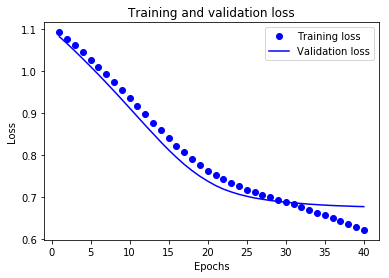

In [19]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

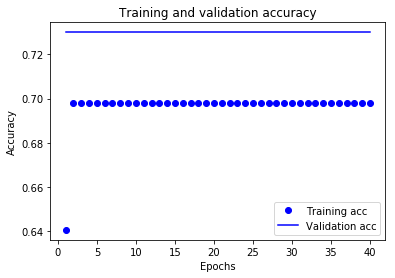

In [21]:
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

## Conclusion
Our training loss and acuracy decrease with each epoch. This is expected when performing gradient descent optimiztion. However, our validation plot shows a strange constant behavior. The model does perform better on the validation data, but overfitting may have occured. In fact, after around 31 epochs, the model over-optimizes and learns representations specific to the training data that do not generalize to test data.

## Further Work
Overfitting could likely be reduced if training was performed over fewer epochs. Our current goal is to improve upon these results and create a front-end interface for user interaction and input of privacy policies.

Ideally, there will be two front end versions that a user can choose to parse Term of Services, although, one is currently in development.  

The version that is currently in the development is a Google Chrome extension application. Initially, this version is what we planned to use as our main user interface, as it would be an intuitive, easy access application for clients once it is completed. However, after finishing the logo and attaching it to the Google Chrome browser, we realized that it is difficult for the app to interact with our back end due to issues with JavaScript.

Our team made some effort researching what could be done to connect our AI engine to the extension. One solution is to actually import a python compiler written in javascript, which would let us compile our python code and port it into the browser. However, we soon realized that although it is possible, it is outside of the scope of this class. 

After some intense discussion, we have made an executive decision to take affirmative actions on moving forward without using the Chrome extension as our main user interface. Nevertheless, we planned on continuing the work of this project and extend this extension in the future to interact with our AI engine.

<center><img src="Capture.png"><center>